# CRM 고객세분화: Customer Segmentation
#### 작성: 고우주 | kubwa 쿱와

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Load Data

In [3]:
df = pd.read_csv('data/Online Retail.csv')

In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010.12.1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010.12.1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010.12.1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010.12.1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010.12.1 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 2. Data Clean-Up

#### - Negative Quantity

In [7]:
df.loc[df['Quantity'] <= 0].shape

(10624, 8)

In [8]:
df.shape

(541909, 8)

In [9]:
df = df.loc[df['Quantity'] > 0]

In [10]:
df.shape

(531285, 8)

#### - Missing CustomerID

In [11]:
pd.isnull(df['CustomerID']).sum()

133361

In [12]:
df.shape

(531285, 8)

In [13]:
df = df[pd.notnull(df['CustomerID'])]

In [14]:
df.shape

(397924, 8)

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010.12.1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010.12.1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010.12.1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010.12.1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010.12.1 8:26,3.39,17850.0,United Kingdom


#### - Excluding Incomplete Month

In [16]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010.12.1 10:03 ~ 2011.9.9 9:52


In [17]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape

(371764, 8)

In [18]:
df.shape

(397924, 8)

In [19]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [20]:
df.shape

(26160, 8)

#### - Total Sales

In [21]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010.12.1 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010.12.1 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010.12.1 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010.12.1 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010.12.1 8:26,3.39,17850.0,United Kingdom,20.34


#### - Per Customer Data

In [23]:
customer_df = df.groupby('CustomerID').agg({'Sales': sum, 'InvoiceNo': lambda x: x.nunique()})
customer_df

,Sales,InvoiceNo
CustomerID,,
12347.0,711.79,1
12348.0,892.80,1
12370.0,1868.02,2
12377.0,1001.52,1
12383.0,600.72,1
...,...,...
18239.0,438.10,1
18245.0,365.73,1
18259.0,376.30,1


In [24]:
customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales'] / customer_df['OrderCount']

In [25]:
customer_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12347.0,711.79,1,711.790
12348.0,892.80,1,892.800
12370.0,1868.02,2,934.010
12377.0,1001.52,1,1001.520
12383.0,600.72,1,600.720
12386.0,258.90,1,258.900
12395.0,679.92,2,339.960
12417.0,291.34,1,291.340
12423.0,237.93,1,237.930


In [26]:
customer_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,885.000000,885.000000,885.000000
mean,647.134339,1.581921,374.793885
std,1473.174581,1.924277,436.779585
min,12.450000,1.000000,12.450000
25%,198.080000,1.000000,170.260000
50%,324.000000,1.000000,286.950000
75%,587.660000,2.000000,403.250000
max,27834.610000,35.000000,6958.652500


In [27]:
# rank =메서드로 매출 순위로 내림차순
rank_df = customer_df.rank(method='first')

In [28]:
rank_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12347.0,710.0,1.0,799.0
12348.0,755.0,2.0,824.0
12370.0,836.0,623.0,829.0
12377.0,772.0,3.0,836.0
12383.0,667.0,4.0,771.0
12386.0,314.0,5.0,405.0
12395.0,698.0,624.0,575.0
12417.0,351.0,6.0,449.0
12423.0,284.0,7.0,375.0


In [29]:
rank_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,885.000000,885.000000,885.000000
mean,443.000000,443.000000,443.000000
std,255.621791,255.621791,255.621791
min,1.000000,1.000000,1.000000
25%,222.000000,222.000000,222.000000
50%,443.000000,443.000000,443.000000
75%,664.000000,664.000000,664.000000
max,885.000000,885.000000,885.000000


In [30]:
# 정규화값  (rank_df - rank_df의 평균값) / rand_df의 표준편차
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()

In [31]:
normalized_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12347.0,1.044512,-1.729117,1.392683
12348.0,1.220553,-1.725205,1.490483
12370.0,1.537428,0.704165,1.510043
12377.0,1.287058,-1.721293,1.537428
12383.0,0.876295,-1.717381,1.283146
12386.0,-0.504652,-1.713469,-0.148657
12395.0,0.997568,0.708077,0.516388
12417.0,-0.359907,-1.709557,0.023472
12423.0,-0.622013,-1.705645,-0.266018


In [32]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,8.850000e+02,8.850000e+02,8.850000e+02
mean,-3.688199e-17,1.204310e-17,-2.521523e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.729117e+00,-1.729117e+00,-1.729117e+00
25%,-8.645585e-01,-8.645585e-01,-8.645585e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.645585e-01,8.645585e-01,8.645585e-01
max,1.729117e+00,1.729117e+00,1.729117e+00


# 3. Customer Segmentation via K-Means Clustering

In [33]:
from sklearn.cluster import KMeans

#### - K-Means Clustering

In [34]:
# 정규화된 변수를 선택한다
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

In [35]:
kmeans

KMeans(n_clusters=4)

In [36]:
kmeans.labels_

array([2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 1, 0, 1, 2, 2, 1,
       2, 0, 1, 2, 2, 3, 0, 0, 2, 2, 3, 0, 0, 0, 1, 1, 2, 1, 0, 3, 0, 2,
       2, 1, 2, 1, 1, 0, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0,
       3, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 3, 2, 2, 2, 2, 0, 3, 2, 1, 1, 2,
       1, 0, 1, 2, 2, 2, 1, 1, 3, 0, 1, 3, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       1, 2, 2, 3, 2, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 1,
       1, 1, 1, 0, 0, 2, 1, 2, 1, 3, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 0, 1, 2, 3, 0, 2, 1, 2, 2, 2, 2, 3, 0, 1, 2, 1, 3, 2, 2, 1, 2,
       1, 0, 2, 3, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2, 0,
       2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 0, 1, 2, 1, 3, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1,
       3, 2, 1, 2, 1, 1, 2, 1, 1, 3, 2, 2, 2, 2, 0, 2, 2, 1, 2, 3, 1, 1,
       2, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2,

In [37]:
kmeans.cluster_centers_

array([[ 1.20921675,  1.02087145,  0.98745094],
       [-1.15756809, -0.53780953, -0.98193396],
       [ 0.37629325, -0.86612963,  0.76996283],
       [-0.03991999,  0.94174006, -0.61462091]])

In [38]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [39]:
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12347.0,1.044512,-1.729117,1.392683,2
12348.0,1.220553,-1.725205,1.490483,2
12370.0,1.537428,0.704165,1.510043,0
12377.0,1.287058,-1.721293,1.537428,2
12383.0,0.876295,-1.717381,1.283146,2


In [40]:
four_cluster_df.groupby('Cluster').count()['TotalSales']

Cluster
0    186
1    269
2    249
3    181
Name: TotalSales, dtype: int64

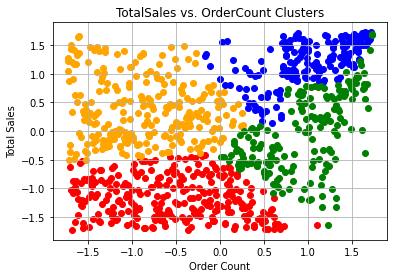

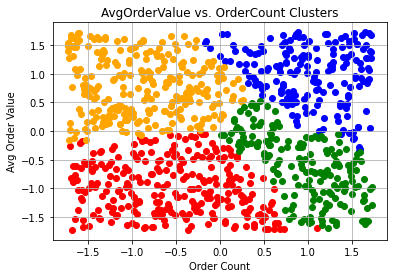

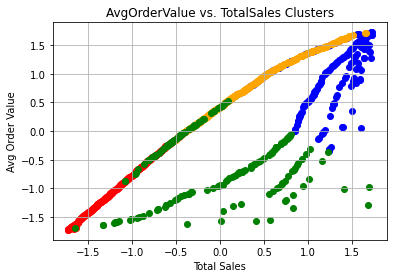

In [41]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

#### - Selecting the best number of clusters

In [42]:
from sklearn.metrics import silhouette_score

In [43]:
for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
    )
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 4 Clusters: 0.3943
Silhouette Score for 5 Clusters: 0.3825
Silhouette Score for 6 Clusters: 0.3904
Silhouette Score for 7 Clusters: 0.4020
Silhouette Score for 8 Clusters: 0.4104


#### - Interpreting Customer Segments

In [44]:
kmeans = KMeans(n_clusters=4).fit(
    normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
)

In [45]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [46]:
four_cluster_df.head(15)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12347.0,1.044512,-1.729117,1.392683,1
12348.0,1.220553,-1.725205,1.490483,1
12370.0,1.537428,0.704165,1.510043,3
12377.0,1.287058,-1.721293,1.537428,1
12383.0,0.876295,-1.717381,1.283146,1
12386.0,-0.504652,-1.713469,-0.148657,1
12395.0,0.997568,0.708077,0.516388,3
12417.0,-0.359907,-1.709557,0.023472,1
12423.0,-0.622013,-1.705645,-0.266018,2


In [47]:
kmeans.cluster_centers_

array([[-0.0587017 ,  0.91947577, -0.6079379 ],
       [ 0.37949842, -0.8640853 ,  0.77331991],
       [-1.16337288, -0.55022843, -0.98953758],
       [ 1.20931921,  1.02390575,  0.98018306]])

In [48]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]
high_value_cluster.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12423.0,-0.622013,-1.705645,-0.266018,2
12441.0,-1.036688,-1.693909,-0.817614,2
12476.0,-1.729117,-1.686085,-1.729117,2
12494.0,-1.662613,0.723725,-1.709557,2
12551.0,-1.087544,-1.674349,-0.888031,2


In [49]:
customer_df.loc[high_value_cluster.index].describe()

,TotalSales,OrderCount,AvgOrderValue
count,267.000000,267.000000,267.000000
mean,152.576479,1.007491,152.326760
std,58.885184,0.086386,59.318853
min,12.450000,1.000000,12.450000
25%,110.375000,1.000000,110.375000
50%,155.350000,1.000000,155.350000
75%,196.165000,1.000000,196.165000
max,277.650000,2.000000,277.650000


In [50]:
pd.DataFrame(df.loc[df['CustomerID'].isin(high_value_cluster.index)
                   ].groupby('Description').count()['StockCode'].sort_values(ascending=False).head())

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,38
PAPER CHAIN KIT 50'S CHRISTMAS,28
REX CASH+CARRY JUMBO SHOPPER,26
HEART OF WICKER LARGE,23
HEART OF WICKER SMALL,23


In [52]:
pd.DataFrame(df.loc[df['CustomerID'].isin(four_cluster_df.loc[four_cluster_df['Cluster'] 
                                                              == 3].index)].groupby('Description').count()['StockCode'].sort_values(ascending=False).head())

,StockCode
Description,
REGENCY CAKESTAND 3 TIER,67
WHITE HANGING HEART T-LIGHT HOLDER,62
CHOCOLATE HOT WATER BOTTLE,56
SCOTTIE DOG HOT WATER BOTTLE,51
HAND WARMER BABUSHKA DESIGN,49
